In [1]:
import sys; sys.path.append('..')
import torch
import numpy as np
from firelab.config import Config
from src.models.lat_gm import LatGM
# from src.dataloaders.load_data import load_data
from src.dataloaders.cub import CUB

# config = Config.load('../configs/lat_gm.yml')
# config.all.hp.model.set('pretrained', True)
# config.all.hp.model.set('num_classes', 200)
# config = Config.load('../configs/base.yml')
# ds_train, ds_test, attrs = load_data(Config({
#  'num_reserved_classes': 0,
#  'num_classes': 200,
#  'num_classes_per_task': 20,
#  'dir': '../data/CUB_200_2011',
#  'num_tasks': 10,
#  'name': 'CUB'}), embed_data=True)

In [2]:
import torchvision.transforms as T
from src.dataloaders.cub import CUB

transform = T.Compose([
    T.ToPILImage(),
    T.CenterCrop([448, 448]),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

ds_train = CUB('../data/CUB_200_2011', train=True, transform=transform)
ds_test = CUB('../data/CUB_200_2011', train=False, transform=transform)

# self.train_dataloader = DataLoader(ds_train, batch_size=self.config.hp.batch_size, shuffle=True)
# self.val_dataloader = DataLoader(ds_test, batch_size=128, shuffle=False)

[Loading dataset]: 100%|██████████| 5794/5794 [02:41<00:00, 35.99it/s]


In [6]:
from src.dataloaders.utils import extract_resnet_features_for_dataset

ds_train_feats = extract_resnet_features_for_dataset(ds_train, resnet_type=50, feat_level='conv', device='cuda', batch_size=256)
ds_test_feats = extract_resnet_features_for_dataset(ds_test, resnet_type=50, feat_level='conv', device='cuda', batch_size=256)

[Extracting features]: 100%|██████████| 23/23 [00:49<00:00,  2.17s/it]


In [7]:
np.save('../data/CUB_EMBEDDED/train_conv_feats_resnet50', ds_train_feats, allow_pickle=True)
np.save('../data/CUB_EMBEDDED/test_conv_feats_resnet50', ds_test_feats, allow_pickle=True)

In [1]:
import numpy as np
data_train = np.load('../data/CUB_EMBEDDED/train_feats_resnet18.npy', allow_pickle=True)
data_test = np.load('../data/CUB_EMBEDDED/test_feats_resnet18.npy', allow_pickle=True)

classes_train = [d[1] for d in data_train]
classes_test = [d[1] for d in data_test]

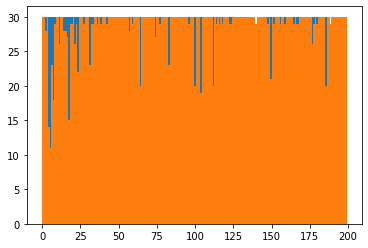

In [16]:
import matplotlib.pyplot as plt

plt.hist(classes_train, bins=200);
plt.hist(classes_test, bins=200);